<a href="https://colab.research.google.com/github/aeapolimi/duckietown/blob/main/duckietown_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Test image filters

In [2]:
import os 
if not os.path.isdir('gym-duckietown') or os.path.isdir('../gym-duckietown'):
  branch = "master" #@param ['master', 'daffy']
  !git clone --branch {branch} https://github.com/duckietown/gym-duckietown.git
  !pip3 install -e gym-duckietown
if os.getcwd() != "/gym-duckietown":
  os.chdir('gym-duckietown')
!apt install xvfb -y
!pip3 install pyvirtualdisplay
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
%matplotlib inline

Cloning into 'gym-duckietown'...
remote: Enumerating objects: 5528, done.
remote: Total 5528 (delta 0), reused 0 (delta 0), pack-reused 5528
Receiving objects: 100% (5528/5528), 79.01 MiB | 34.17 MiB/s, done.
Resolving deltas: 100% (3220/3220), done.
Obtaining file:///content/gym-duckietown
     |████████████████████████████████| 225kB 8.7MB/s 
     |████████████████████████████████| 92kB 7.1MB/s 
  Created wheel for duckietown-slimremote: filename=duckietown_slimremote-2018.10.1-cp36-none-any.whl size=1522 sha256=6cc0343e85e4f205673893cf0548d26bef2bb798a262bb727185881fde0959a9
  Stored in directory: /root/.cache/pip/wheels/fe/b7/45/f23813d245dd37135151cdac7c098b81f9636d2ae64320f832
  Created wheel for pygeometry: filename=PyGeometry-1.5.6-cp36-none-any.whl size=68837 sha256=34de364c7eacb02d1bf4d8d49013f2f9f098fafcfef459158c0249fd88b6149f
  Stored in directory: /root/.cache/pip/wheels/90/c1/e4/c1fca68a862dd2d38d7b905b8c8931f9a8863cdf736c607aeb
  Created wheel for PyContracts: filename=

In [25]:
plt.rcParams['figure.figsize'] = [20, 10]

In [1]:
map_name = "Duckietown-small_loop-v0" #@param ['Duckietown-straight_road-v0','Duckietown-4way-v0','Duckietown-udem1-v0','Duckietown-small_loop-v0','Duckietown-small_loop_cw-v0','Duckietown-zigzag_dists-v0','Duckietown-loop_obstacles-v0','Duckietown-loop_pedestrians-v0']

In [129]:
import cv2
import gym
from gym.spaces import Box

cutted_img_height = 400
img_height = 480
top_crop = img_height - cutted_img_height

def cropimg(img):
    # Cropped top top_crop px, they are noise most of the time
    return img[top_crop:,:]

def houghtransform(img):
    frame_BGR = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY, 3)
    edges = cv2.Canny(frame_BGR,50,150,apertureSize = 3)
    #minLineLength = 100
    #maxLineGap = 10
    #lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
    #for x1,y1,x2,y2 in lines[0]:
    #    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    imgRGB = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
    return imgRGB
  
def takeyellow(frame):
    # https://stackoverflow.com/questions/48109650/how-to-detect-two-different-colors-using-cv2-inrange-in-python-opencv
    frame_HSV = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    frame_threshold = cv2.inRange(frame_HSV, (25,0,0), (35, 255, 255))
    imgRGB = cv2.cvtColor(frame_threshold, cv2.COLOR_GRAY2RGB)
    return imgRGB

class ObsWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super(ObsWrapper, self).__init__(env)
        self.observation_space = Box(0, 255, (cutted_img_height, 640, 1), dtype=self.observation_space.dtype)
        self.accept_start_angle_deg = 4
        self.env = env

    def observation(self, obs):
        cropped = cropimg(obs)
        img = takeyellow(cropped)
        return img

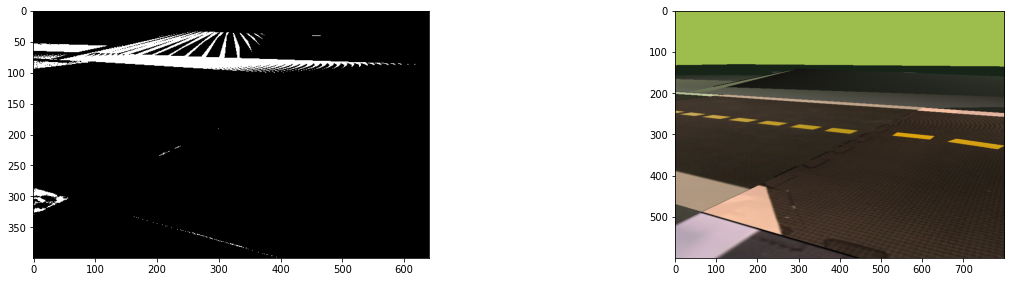

In [130]:
import gym, gym_duckietown

display = Display(visible=0, size=(1400, 900))
display.start()

env = ObsWrapper(gym.make(map_name))

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(10):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)

  plt.subplot(2, 2, 1)
  plt.imshow(obs)
  plt.subplot(2, 2, 2)
  plt.imshow(env.render(mode="rgb_array"))
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)